In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

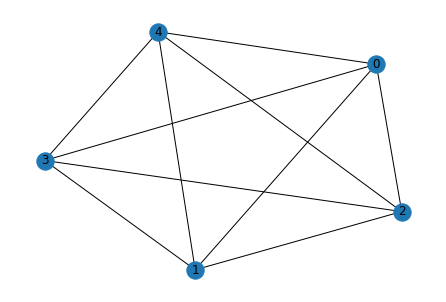

In [2]:
# Generate and draw a complete graph
simple_graph = nx.complete_graph(5)
nx.draw(simple_graph, with_labels=True)

In [3]:
# Print Adjacency matrix - dense since return value is sparse
simple_adjacency_matrix = nx.adjacency_matrix(simple_graph).todense()
simple_adjacency_matrix

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]])

The adjacency matrix represents the relationships between the nodes.
- Since it is a complete graph, every node is connected to every other node.
- Since no node is connected to itself, the diagonals are all zeros.
- The matrix is symmetric, so the upper triangle is the same as the lower triangle.

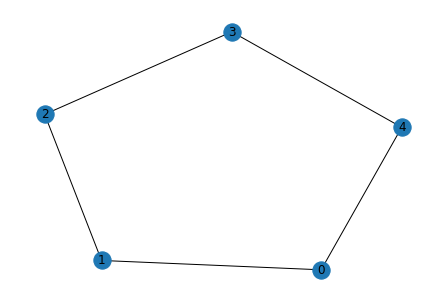

In [4]:
# Draw a circulant graph - Understand offsets
circulant_graph = nx.circulant_graph(5, [1])
nx.draw(circulant_graph, with_labels=True)

In [5]:
circulant_adjacency_matrix = nx.adjacency_matrix(circulant_graph).todense()
circulant_adjacency_matrix

matrix([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]])

## Weighted graphs

In [33]:
# Generate Erdos-Renyi graph
random_graph = nx.gnp_random_graph(5, 0.4)

# Assign weights to edges
nx.set_edge_attributes(random_graph, name='weight', values={e: np.random.randint(1, 10) for e in random_graph.edges()})
list(random_graph.edges(data=True))

[(0, 3, {'weight': 4}),
 (0, 4, {'weight': 3}),
 (1, 4, {'weight': 8}),
 (2, 4, {'weight': 5}),
 (3, 4, {'weight': 8})]

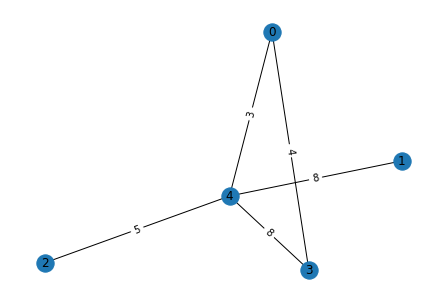

In [34]:
# Draw graph
pos = nx.spring_layout(random_graph)
nx.draw(random_graph, pos, with_labels=True)

# Add labels for weights
weights = nx.get_edge_attributes(random_graph, 'weight')
nx.draw_networkx_edge_labels(random_graph, pos, edge_labels=weights)
plt.show()

In [35]:
# Print adjacency matrix
print(nx.adjacency_matrix(random_graph).todense())

[[0 0 0 4 3]
 [0 0 0 0 8]
 [0 0 0 0 5]
 [4 0 0 0 8]
 [3 8 5 8 0]]


The binary value representing edges is replaced by the weight in the adjacency matrix.

## Directed graphs

In [36]:
random_directed_graph = nx.gnp_random_graph(5, 0.4, directed=True)
nx.set_edge_attributes(random_directed_graph, name='weight', values={e: np.random.randint(1, 10) for e in random_directed_graph.edges()})
list(random_directed_graph.edges(data=True))

[(0, 1, {'weight': 1}),
 (0, 2, {'weight': 3}),
 (0, 4, {'weight': 7}),
 (2, 1, {'weight': 3}),
 (3, 0, {'weight': 8}),
 (4, 0, {'weight': 8}),
 (4, 2, {'weight': 8}),
 (4, 3, {'weight': 6})]

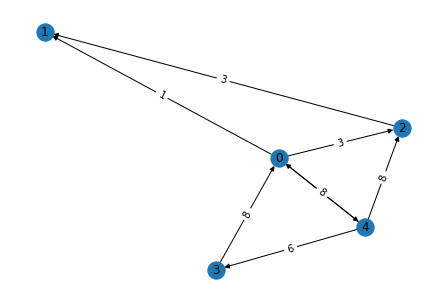

In [37]:
# Draw graph
pos = nx.spring_layout(random_directed_graph)
nx.draw(random_directed_graph, pos, with_labels=True)

# Add labels for weights
weights = nx.get_edge_attributes(random_directed_graph, 'weight')
nx.draw_networkx_edge_labels(random_directed_graph, pos, edge_labels=weights)
plt.show()

In [11]:
# Print adjacency matrix
print(nx.adjacency_matrix(random_directed_graph).todense())

[[0 0 0 0 8]
 [0 0 0 0 6]
 [0 8 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]]


## Bipartite graphs

In [12]:
# Generate a random bipartite graph
bipartite_graph = nx.algorithms.bipartite.random_graph(3, 2, 0.9)

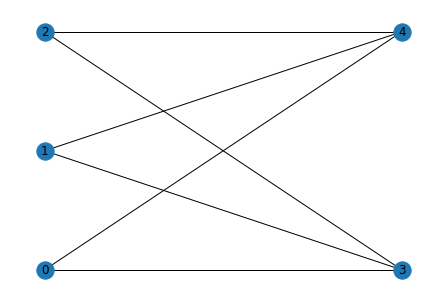

In [13]:
# Draw graph with bipartite layout
top = nx.bipartite.sets(bipartite_graph)[0]
pos = nx.bipartite_layout(bipartite_graph, top)
nx.draw(bipartite_graph, pos, with_labels=True)

In [14]:
bipartite_graph.nodes(data=True)

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 1}, 4: {'bipartite': 1}})

In [15]:
nx.bipartite.sets(bipartite_graph)

({0, 1, 2}, {3, 4})

In [16]:
# Print incidence matrix - Check difference with adjacency matrix
print(nx.incidence_matrix(bipartite_graph).todense())

[[1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]]


In [17]:
# Print biadjacency matrix
node_order = list(range(0, len(bipartite_graph.nodes)))
print(nx.bipartite.matrix.biadjacency_matrix(bipartite_graph, [0, 1, 2]).todense())

[[1 1]
 [1 1]
 [1 1]]


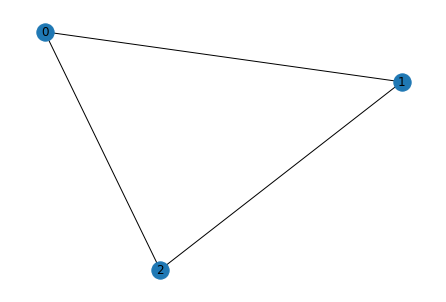

In [18]:
# Read up - one-mode 
one_mode_projection = nx.bipartite.projected_graph(bipartite_graph, [0, 1, 2])
nx.draw(one_mode_projection, with_labels=True)

## Degree

In [19]:
simple_graph_degrees = [degree for node, degree in simple_graph.degree()]
simple_graph_degrees

[4, 4, 4, 4, 4]

In [20]:
circulant_graph_degrees = [degree for node, degree in circulant_graph.degree()]
circulant_graph_degrees

[2, 2, 2, 2, 2]

## Laplacian matrix

In [21]:
simple_adjacency_matrix

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]])

In [22]:
# Print lapacian matrix
print(nx.laplacian_matrix(simple_graph).todense())

[[ 4 -1 -1 -1 -1]
 [-1  4 -1 -1 -1]
 [-1 -1  4 -1 -1]
 [-1 -1 -1  4 -1]
 [-1 -1 -1 -1  4]]


if i = j: 
> $L_{ij}$ = $k_{i}$

else if i != j and $A_{ij}$ = 1: 
> $L_{ij}$ = -1

else: 
> $L_{ij}$ = 0

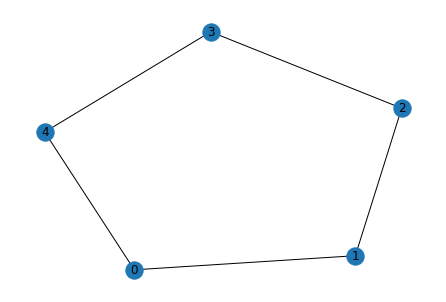

In [23]:
nx.draw(circulant_graph, with_labels=True)

In [24]:
circulant_adjacency_matrix

matrix([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]])

In [25]:
nx.laplacian_matrix(circulant_graph).todense()

matrix([[ 2, -1,  0,  0, -1],
        [-1,  2, -1,  0,  0],
        [ 0, -1,  2, -1,  0],
        [ 0,  0, -1,  2, -1],
        [-1,  0,  0, -1,  2]])

\begin{equation*}
L_{ij} = k_{i}\delta_{ij} - A_{ij}
\end{equation*}


$\delta_{ij}$ (Kronecker delta) = 
\begin{cases}
    1,& \text{if } i = j\\
    0,              & \text{otherwise}
\end{cases}

This can also be written as:
\begin{equation*}
\textbf{L} = \textbf{D} - \textbf{A}
\end{equation*}

where $\textbf{D}$ is the degree matrix with degrees along the diagonal

In [26]:
# Prove L = D - A
L = nx.laplacian_matrix(circulant_graph).todense()
L

matrix([[ 2, -1,  0,  0, -1],
        [-1,  2, -1,  0,  0],
        [ 0, -1,  2, -1,  0],
        [ 0,  0, -1,  2, -1],
        [-1,  0,  0, -1,  2]])

In [27]:
A = circulant_adjacency_matrix
D = np.diag(circulant_graph_degrees)
L_hat = D - A
L_hat

matrix([[ 2, -1,  0,  0, -1],
        [-1,  2, -1,  0,  0],
        [ 0, -1,  2, -1,  0],
        [ 0,  0, -1,  2, -1],
        [-1,  0,  0, -1,  2]])

In [28]:
# Assert that L = D - A
np.testing.assert_array_equal(L, L_hat)

### Properties of the Laplacian matrix

1. Every row and column of the Laplacian matrix sums to zero.
\begin{equation*}
\sum_{j=1}^n L_{ij} = \sum_{j=1}^n (k_{i}\delta_{ij} - A_{ij}) = k_{i} - k_{i} = 0
\end{equation*}

2. The eigenvalues of the Laplacian matrix are non-negative.